In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os

In [28]:
df_int = pd.read_pickle("./omc1-int-cgs.pkl")
df_err = pd.read_pickle("./omc1-err-cgs.pkl")
df_int.head()

13c_o_j2__j1  cp_el2p_j3_2__el2p_j1_2    chp_j1__j0  co_v0_j10__v0_j9  \
X Y                                                                          
0 0  6.434450e-08                      NaN           NaN         -0.000002   
  1  6.611934e-08                 0.001511  2.809610e-07         -0.000002   
  2  7.151950e-08                 0.001501  3.581804e-07         -0.000002   
  3  8.042203e-08                 0.001491  9.968447e-07         -0.000002   
  4  9.104496e-08                 0.001465  3.233371e-07         -0.000004   

     co_v0_j2__v0_j1  hcop_j3__j2  
X Y                                
0 0     9.762374e-07          NaN  
  1     1.005557e-06          NaN  
  2     1.087570e-06          NaN  
  3     1.223851e-06          NaN  
  4     1.345087e-06          NaN

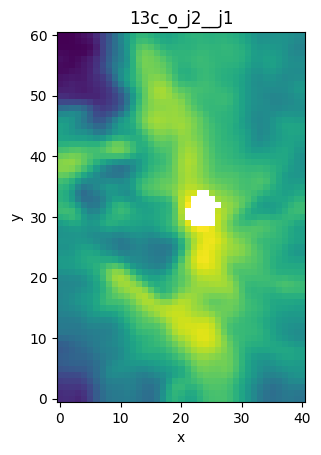

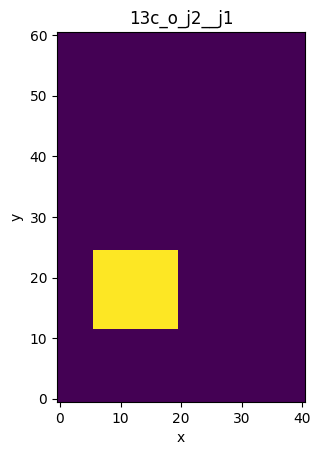

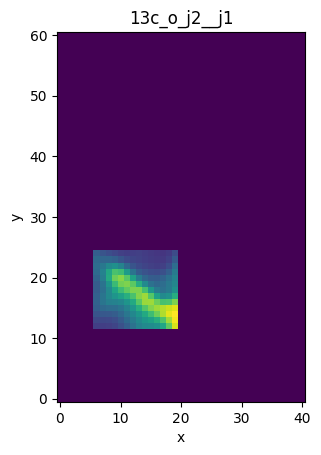

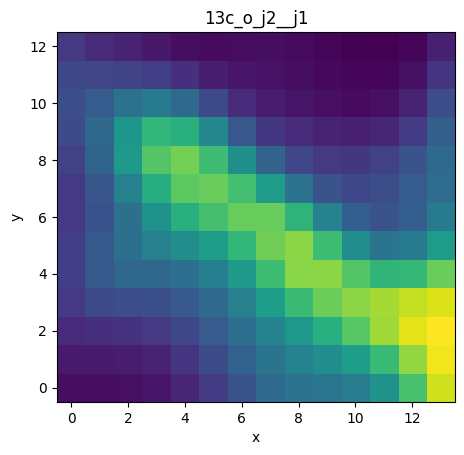

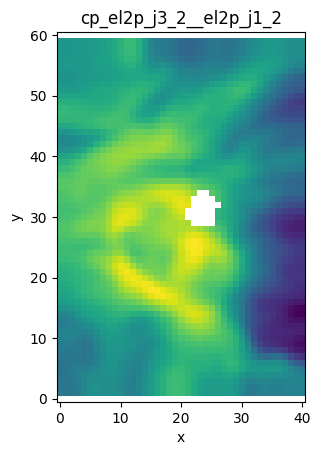

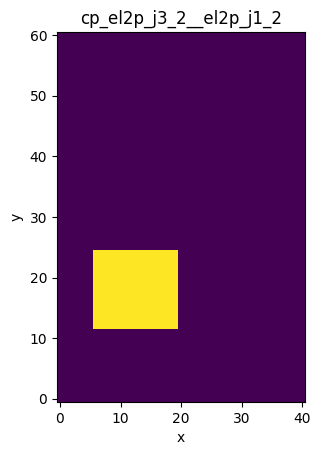

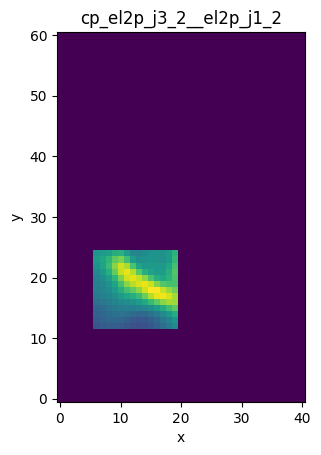

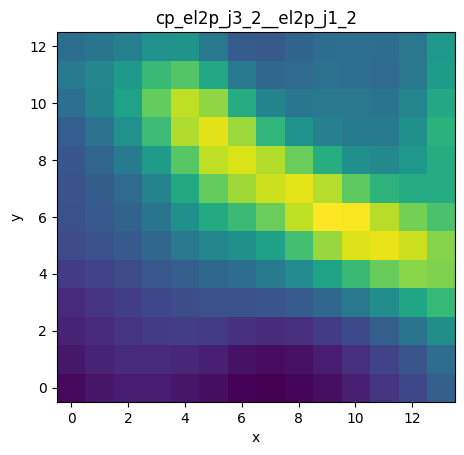

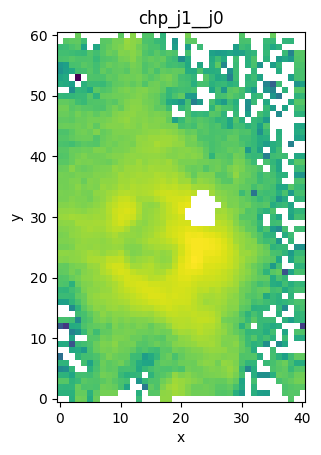

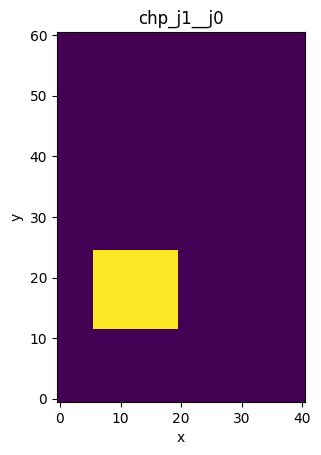

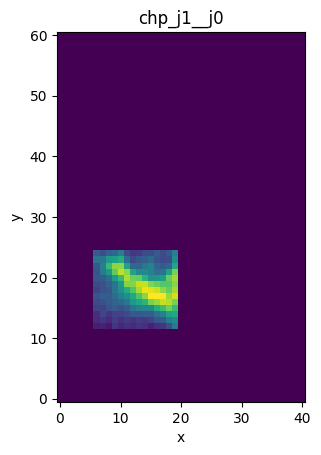

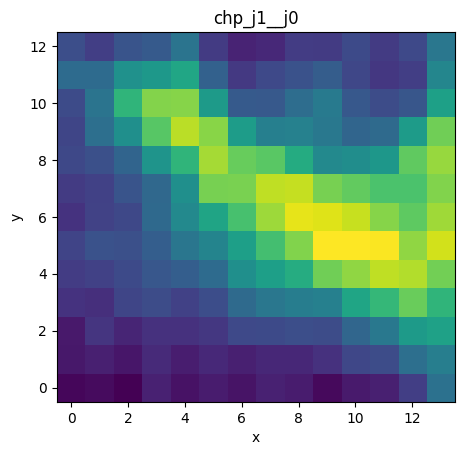

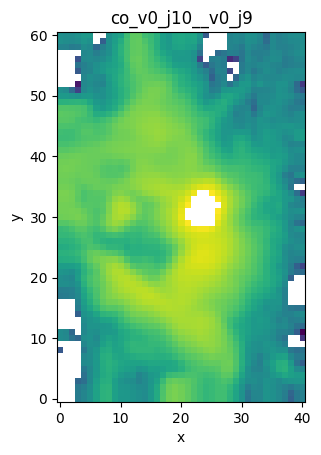

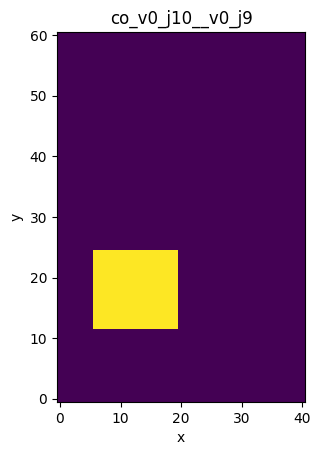

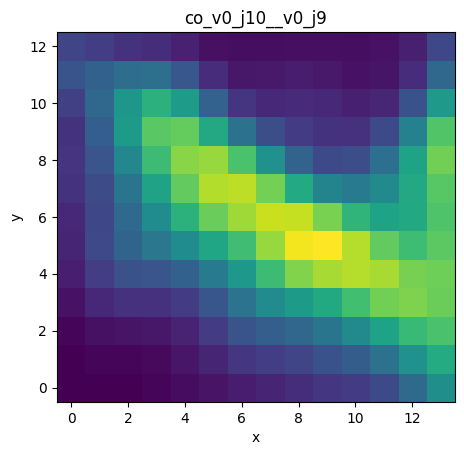

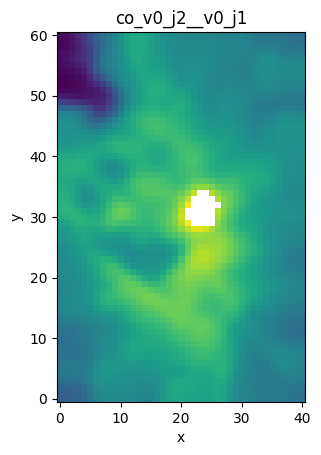

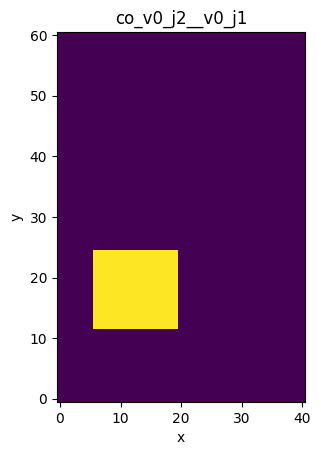

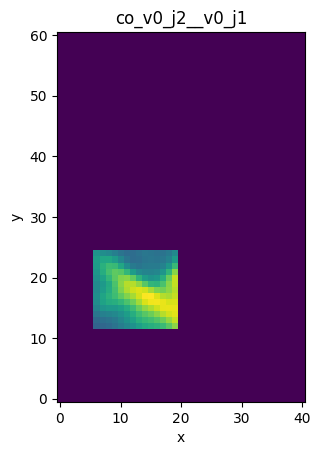

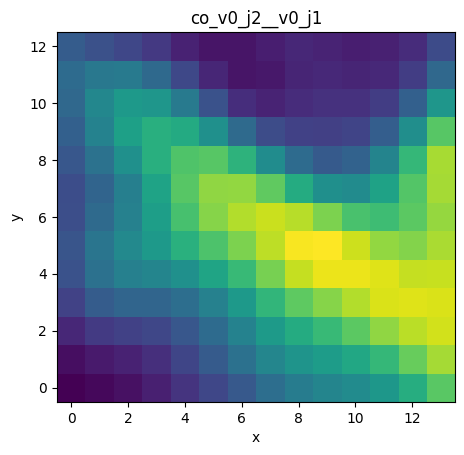

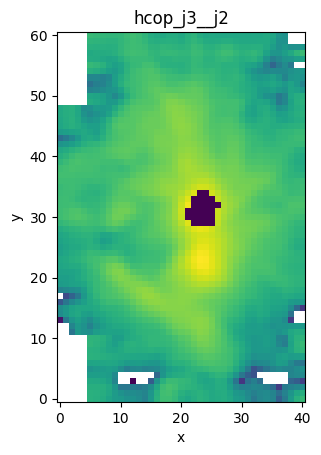

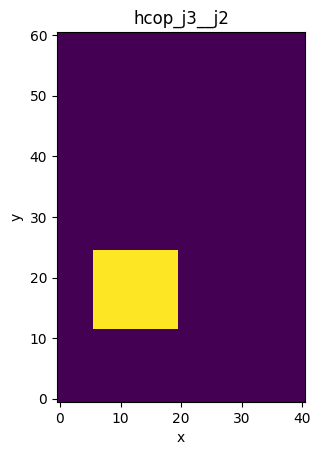

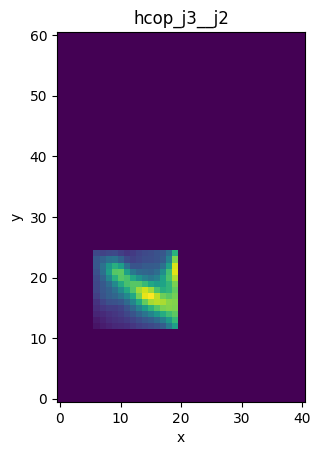

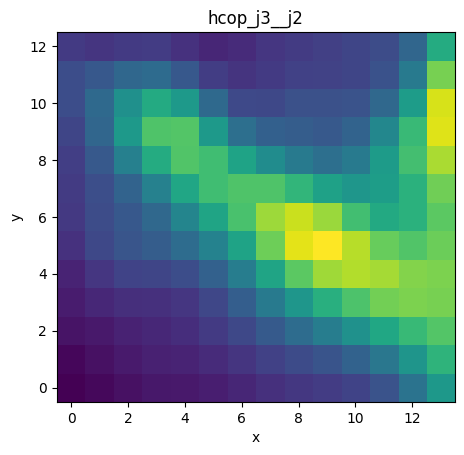

In [41]:
sizes = np.array(df_int.index.max()) - np.array(df_int.index.values.min()) + 1
arr = np.zeros(sizes[::-1])

x_min, x_max = 6, 20
y_min, y_max = 12, 25

for line in list(df_int.columns):
    for x, y in df_int.index:
        arr[y, x] = df_int.at[(x, y), line]

    mask = np.zeros_like(arr)
    mask[y_min:y_max, x_min:x_max] = 1

    arr_masked = np.zeros_like(mask)
    arr_masked[y_min:y_max, x_min:x_max] = arr[y_min:y_max, x_min:x_max] * 1

    arr_restricted = arr[y_min:y_max, x_min:x_max] * 1

    plt.title(line)
    plt.imshow(arr, origin="lower", norm=colors.LogNorm())
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    plt.title(line)
    plt.imshow(mask, origin="lower")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    plt.title(line)
    plt.imshow(arr_masked, origin="lower")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    plt.title(line)
    plt.imshow(arr_restricted, origin="lower")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [37]:
def resize_dataset(df):
    df_orionbar = df.reset_index()
    df_orionbar = df_orionbar.loc[
        (df_orionbar["X"] >= x_min)
        & (df_orionbar["X"] <= x_max)
        & (df_orionbar["Y"] >= y_min)
        & (df_orionbar["Y"] <= y_max)
    ]

    df_orionbar["X"] -= df_orionbar["X"].min()
    df_orionbar["Y"] -= df_orionbar["Y"].min()

    df_orionbar = df_orionbar.set_index(["X", "Y"])
    df_orionbar = df_orionbar.sort_index()
    return df_orionbar


df_int_orionbar = resize_dataset(df_int)
df_err_orionbar = resize_dataset(df_err)

In [38]:
df_int_orionbar.to_pickle("../omc1-orionbar/omc1-orionbar-int-cgs.pkl")
df_err_orionbar.to_pickle("../omc1-orionbar/omc1-orionbar-err-cgs.pkl")

In [40]:
np.log(3) / np.log(10 / 9)

10.427172663391412